# CarMax Analytics Showcase 2021

https://analyticsshowcase.carmax.com/

https://github.com/kmx-analytics-showcase/2021

## Question
In today’s marketplace, customers expect and demand a personalized experience. Given historical industry sales, how can CarMax tailor its marketing and inventory strategies to draw in distinct segments of consumers?

## Data
A subset of nationwide used-car purchases for 2013, with vehicle purchase information, customer demographics, and post-purchase experience. The subset should be considered representative of the US used car market. The response variable is a count of vehicles purchased by the same customer at the same dealer in the 5 following years, 2014-2018. In your data, it's labeled as "Subsequent Purchases." In all columns, a '?' symbol indicates null or missing values.

|Columns|Description|Data Type|
|:-------|:-----------|:---------|
|insert_num|Primary Index, unique for each customer and purchase|Integer|
|purchase_make|The vehicle make of the customer's 2013 vehicle purchase|String|
|purchase_model|The vehicle model of the customer's 2013 vehicle purchase|String|
|purchase_vehicle_year|The vehicle year of the customer's 2013 vehicle purchase|Integer|
|purchase_price|The purchase price of the customer's 2013 vehicle purchase, in \$5,000 increments|String|
|trade_in|Indicator (0,1) of whether the customer traded-in a vehicle they owned during the 2013 vehicle purchase|Integer|
|vehicle_financing|Indicator (0,1) of whether the customer required a loan to finance the 2013 vehicle purchase|Integer|
|customer_age|Customer's age at time of 2013 vehicle purchase, in 10 year increments|String|
|customer_income|Customer's income at time of 2013 vehicle purchase, in $20k increments|String|
|customer_gender|Customer's gender|Integer|
|customer_previous_purchase|Indicator (0,1) of whether the customer purchased a vehicle prior to 2013 from the same dealer|Integer|
|customer_distance_to_dealer|Customer's distance from dealership at time of 2013 vehicle purchase|Integer|
|post_purchase_satisfaction|Customer response to post-purchase satisfaction survey regarding 2013 vehicle purchase (0 = low, 10 = high)|Integer|
|vehicle_warranty_used|Indicator of whether the customer leveraged dealer's vehicle warranty for 2013 purchase|Integer|
|subsequent_purchases|Count of subsequent customer purchases following 2013 vehicle purchase|Integer|

## Table of Contents

[Hypotheses](#Hypotheses)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)

[Data Preprocessing](#Data-pre-processing)

[Linear regression for subsequent purchase prediction](#Linear-regression-to-predict-subsequent-purchases)

[Binary classification for subsequent purchases](#Binary-classification-for-subsequent-purchases)

[Clustering with Interpretation](#Clustering-with-Interpretation)

[Matrix Completion](#Matrix-Completion)

[Future Work](#Conclusions-and-Future-Work)

## Hypotheses

We want to match customer segments (age, income, gender, vehicle financing, distance from dealership, whether they bought in the past, whether they traded in, whether they used a warranty) to vehicle types (make, model, year, price). We can measure how successful the match is using post-purchase satisfaction and whether they make subsequent purchases with Carmax. By predicting which type of car will be best suited for each Carmax customer, we can help Carmax tailor their marketing and sales strategies. We can make customer satisfaction predictions at the make-year level, or the make-model-year level.

Ideas:

- Younger customers may buy smaller cars, older customers may buy more SUVs
- Car purchases will vary by income, gender
- Customers using loans to purchase a car will buy less costly vehicles/alternatively, they may buy more costly vehicles as they are less risk-averse
- Relationship between using a warranty and the make/model of the car purchased

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("CaseCompetitionData2021.csv", na_values="?")
data

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,0,8.0,NaN,0,1
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,1,19.0,NaN,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,1,21.0,NaN,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,0,8.0,NaN,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,1,5.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,0,13.0,NaN,0,0
355870,58219,CHEVROLET,SONIC,2012,10001 - 15000,1,0,71 - 80,NaN,U,0,2.0,NaN,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,1,9.0,NaN,0,1
355872,252391,NISSAN,350Z,2003,10001 - 15000,0,1,21 - 30,40001 - 60000,M,0,5.0,NaN,0,0


In [4]:
data.dtypes

insert_num                       int64
purchase_make                   object
purchase_model                  object
purchase_vehicle_year            int64
purchase_price                  object
trade_in                         int64
vehicle_financing                int64
customer_age                    object
customer_income                 object
customer_gender                 object
customer_previous_purchase       int64
customer_distance_to_dealer    float64
post_purchase_satisfaction     float64
vehicle_warranty_used            int64
subsequent_purchases             int64
dtype: object

Text(0.5, 1.0, 'Count of Makes Purchased')

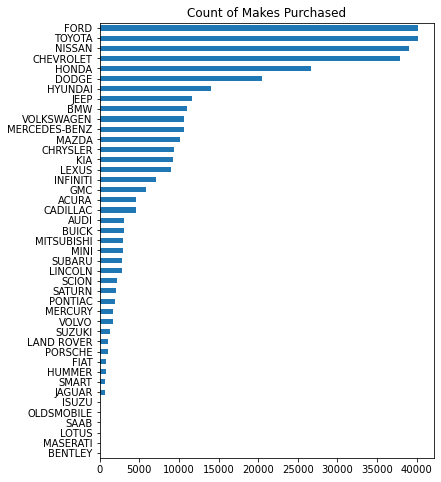

In [5]:
plt.figure(figsize=(6,8))
data.purchase_make.value_counts().sort_values().plot(kind="barh")
plt.title("Count of Makes Purchased")

In [6]:
data.purchase_model.nunique()

639

Text(0.5, 1.0, 'Count of Purchases by Vehicle Year')

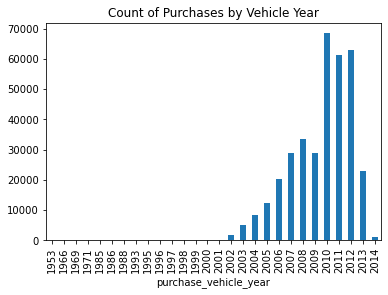

In [7]:
data.groupby('purchase_vehicle_year').count().insert_num.plot(kind='bar')
plt.title("Count of Purchases by Vehicle Year")

Text(0.5, 1.0, 'Count of Purchases by Price')

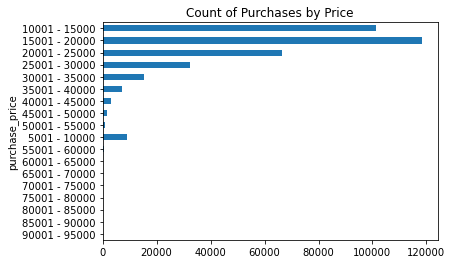

In [8]:
data.groupby('purchase_price').count().insert_num[::-1].plot(kind='barh')
plt.title("Count of Purchases by Price")

In [9]:
data.trade_in.value_counts()

0    189975
1    165899
Name: trade_in, dtype: int64

In [10]:
data.vehicle_financing.value_counts()

1    277348
0     78526
Name: vehicle_financing, dtype: int64

In [11]:
data.loc[data.customer_age == '101+','customer_age'] = '99_101+'

Text(0.5, 1.0, 'Count of Purchases by Customer Age')

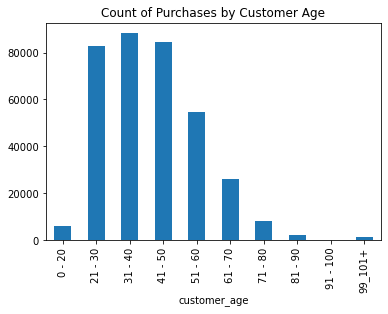

In [12]:
data.groupby('customer_age').count().insert_num.plot(kind='bar')
plt.title("Count of Purchases by Customer Age")

Text(0.5, 1.0, 'Count of purchases by Customer Income')

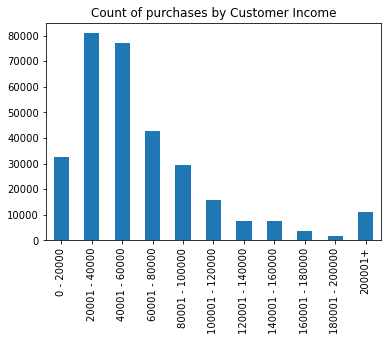

In [14]:
(data['customer_income'].value_counts().iloc[[3,0,1,2,4,5,8,7,9,10,6]]).plot(kind='bar')
plt.title("Count of purchases by Customer Income")

Text(0.5, 1.0, 'Count of purchases by Customer gender')

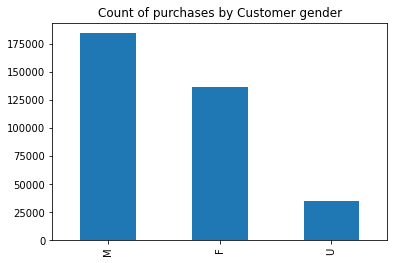

In [15]:
data.customer_gender.value_counts().plot(kind='bar')
plt.title("Count of purchases by Customer gender")

In [16]:
data.customer_previous_purchase.value_counts()

0    283003
1     72871
Name: customer_previous_purchase, dtype: int64

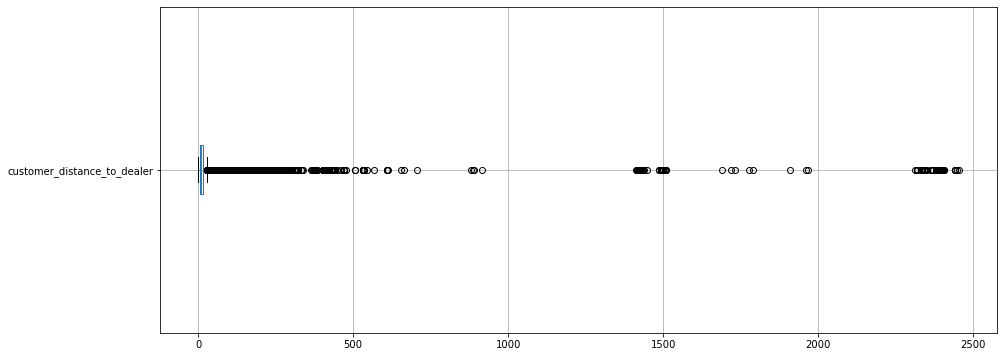

In [17]:
plt.figure(figsize=(15,6))
data.boxplot(column='customer_distance_to_dealer',vert=False)

In [18]:
data.post_purchase_satisfaction.value_counts(dropna=False)

NaN     354676
10.0       803
9.0        221
8.0         92
7.0         34
6.0         12
5.0         12
0.0         12
4.0          6
3.0          5
1.0          1
Name: post_purchase_satisfaction, dtype: int64

We may not be able to use post-purchase satisfaction as our main response variable

In [19]:
data.vehicle_warranty_used.value_counts(dropna=False)

0    266158
1     89716
Name: vehicle_warranty_used, dtype: int64

Text(0.5, 1.0, 'Histogram of Future Purchase Count')

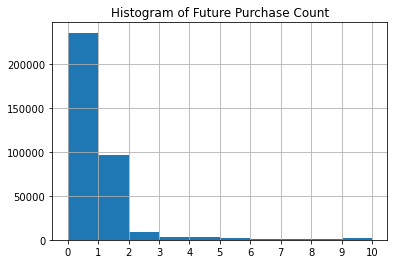

In [20]:
data.subsequent_purchases.hist(bins=10)
plt.xticks(range(0,11));
plt.title("Histogram of Future Purchase Count")

In [21]:
data.subsequent_purchases.describe()

count    355874.000000
mean          0.533416
std           1.190327
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: subsequent_purchases, dtype: float64

In [22]:
data.isna().mean()

insert_num                     0.000000
purchase_make                  0.000000
purchase_model                 0.000000
purchase_vehicle_year          0.000000
purchase_price                 0.000008
trade_in                       0.000000
vehicle_financing              0.000000
customer_age                   0.003085
customer_income                0.129254
customer_gender                0.000000
customer_previous_purchase     0.000000
customer_distance_to_dealer    0.017149
post_purchase_satisfaction     0.996634
vehicle_warranty_used          0.000000
subsequent_purchases           0.000000
dtype: float64

## Data pre-processing

1. Handle NAs

Drop `post_purchase_satisfaction`, drop rows with `NaN` `customer_age`, `customer_income`, and `customer_distance_to_dealer`

In [13]:
data_cleaned = data.drop(columns='post_purchase_satisfaction')

In [14]:
data_cleaned = data_cleaned.dropna()

In [15]:
data_cleaned

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,0,8.0,0,1
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,1,19.0,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,1,21.0,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,0,8.0,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,1,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355866,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,1,3.0,0,0
355868,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,0,14.0,0,4
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,0,13.0,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,1,9.0,0,1


In [16]:
data_cleaned.isna().mean()

insert_num                     0.0
purchase_make                  0.0
purchase_model                 0.0
purchase_vehicle_year          0.0
purchase_price                 0.0
trade_in                       0.0
vehicle_financing              0.0
customer_age                   0.0
customer_income                0.0
customer_gender                0.0
customer_previous_purchase     0.0
customer_distance_to_dealer    0.0
vehicle_warranty_used          0.0
subsequent_purchases           0.0
dtype: float64

In [17]:
data_cleaned_sat = data.dropna()

In [18]:
data_cleaned_sat

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
323,157752,HONDA,CR-V,2008,15001 - 20000,1,1,31 - 40,20001 - 40000,F,0,3.0,3.0,0,0
766,212545,LEXUS,ES 330,2004,10001 - 15000,1,1,41 - 50,100001 - 120000,M,0,2.0,9.0,0,1
1298,292828,PONTIAC,SOLSTICE,2006,15001 - 20000,0,1,51 - 60,40001 - 60000,F,0,9.0,10.0,0,0
1324,293970,PORSCHE,CAYENNE,2009,35001 - 40000,0,1,41 - 50,200001+,M,1,22.0,10.0,0,0
1396,91682,DODGE,RAM 1500,2010,15001 - 20000,0,1,51 - 60,60001 - 80000,M,0,115.0,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353618,297131,SCION,TC,2009,10001 - 15000,0,1,0 - 20,40001 - 60000,U,0,12.0,10.0,1,0
353843,106528,FORD,EXPLORER,2006,10001 - 15000,0,1,31 - 40,20001 - 40000,U,0,11.0,10.0,0,0
354083,111544,FORD,F150,2010,15001 - 20000,0,0,51 - 60,60001 - 80000,M,0,9.0,7.0,1,1
354796,134424,FORD,TAURUS,2011,20001 - 25000,1,1,0 - 20,100001 - 120000,M,0,20.0,10.0,1,0


2. Encode categorical variables as numeric

|column|dtype|
|:---|:---|
|insert_num|                       int64|
|purchase_make         |          object|
|purchase_model         |         object|
|purchase_vehicle_year   |         int64|
|purchase_price     |             object|
|trade_in            |             int64|
|vehicle_financing    |            int64|
|customer_age          |          object|
|customer_income        |         object|
|customer_gender             |    object|
|customer_previous_purchase  |     int64|
|customer_distance_to_dealer  |  float64|
|post_purchase_satisfaction  |   float64|
|vehicle_warranty_used       |     int64|
|subsequent_purchases        |     int64|

`purchase_make`: one-hot encoding

`purchase_model`: one-hot encoding

Note 1: when making predictions we will either use the set of `purchase_make` columns or the set of `purchase_model` columns

Note 2: we may be able to leave `purchase_vehicle_year` as numeric because we can hypothesize that buying a newer car vs. an older car in 2013 could create different levels of customer satisfaction

`purchase_price`: encode from 0-17

`customer_age`: encode from 0-9

`customer_income`: encode from 0-10

`customer_gender`: one-hot encoding

In [19]:
data_cleaned_make = pd.concat([data_cleaned, pd.get_dummies(data_cleaned.purchase_make)], axis=1)
data_cleaned_make

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,PORSCHE,SAAB,SATURN,SCION,SMART,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,...,0,0,0,0,0,0,0,0,0,0
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,...,0,0,0,0,0,0,0,0,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,...,0,0,0,0,0,0,0,0,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,...,0,0,0,0,0,0,0,0,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355866,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,...,0,0,0,0,0,0,0,1,0,0
355868,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,0,0,1,0,0
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_cleaned_model = pd.concat([data_cleaned, pd.get_dummies(data_cleaned.purchase_model)], axis=1)
data_cleaned_model

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,YUKON XL 1500,YUKON XL 2500,Z3,Z4,ZDX,ZEPHYR,i-280,i-290,i-350,i-MIEV
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,...,0,0,0,0,0,0,0,0,0,0
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,...,0,0,0,0,0,0,0,0,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,...,0,0,0,0,0,0,0,0,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,...,0,0,0,0,0,0,0,0,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355866,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,...,0,0,0,0,0,0,0,0,0,0
355868,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,0,0,0,0,0
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_cleaned_model = pd.concat([data_cleaned, pd.get_dummies(data_cleaned.purchase_model)], axis=1)
data_cleaned_model

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,YUKON XL 1500,YUKON XL 2500,Z3,Z4,ZDX,ZEPHYR,i-280,i-290,i-350,i-MIEV
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,...,0,0,0,0,0,0,0,0,0,0
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,...,0,0,0,0,0,0,0,0,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,...,0,0,0,0,0,0,0,0,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,...,0,0,0,0,0,0,0,0,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355866,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,...,0,0,0,0,0,0,0,0,0,0
355868,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,0,0,0,0,0
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_cleaned_sat = pd.concat([data_cleaned_sat, pd.get_dummies(data_cleaned_sat.purchase_make)], axis=1)
data_cleaned_sat

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,PONTIAC,PORSCHE,SATURN,SCION,SMART,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO
323,157752,HONDA,CR-V,2008,15001 - 20000,1,1,31 - 40,20001 - 40000,F,...,0,0,0,0,0,0,0,0,0,0
766,212545,LEXUS,ES 330,2004,10001 - 15000,1,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,0,0,0,0,0
1298,292828,PONTIAC,SOLSTICE,2006,15001 - 20000,0,1,51 - 60,40001 - 60000,F,...,1,0,0,0,0,0,0,0,0,0
1324,293970,PORSCHE,CAYENNE,2009,35001 - 40000,0,1,41 - 50,200001+,M,...,0,1,0,0,0,0,0,0,0,0
1396,91682,DODGE,RAM 1500,2010,15001 - 20000,0,1,51 - 60,60001 - 80000,M,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353618,297131,SCION,TC,2009,10001 - 15000,0,1,0 - 20,40001 - 60000,U,...,0,0,0,1,0,0,0,0,0,0
353843,106528,FORD,EXPLORER,2006,10001 - 15000,0,1,31 - 40,20001 - 40000,U,...,0,0,0,0,0,0,0,0,0,0
354083,111544,FORD,F150,2010,15001 - 20000,0,0,51 - 60,60001 - 80000,M,...,0,0,0,0,0,0,0,0,0,0
354796,134424,FORD,TAURUS,2011,20001 - 25000,1,1,0 - 20,100001 - 120000,M,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data_cleaned_make = pd.concat([data_cleaned_make, pd.get_dummies(data_cleaned.customer_gender)],axis=1)
data_cleaned_model = pd.concat([data_cleaned_model, pd.get_dummies(data_cleaned.customer_gender)],axis=1)
data_cleaned_sat = pd.concat([data_cleaned_sat, pd.get_dummies(data_cleaned_sat.customer_gender)],axis=1)

In [24]:
purch = pd.DataFrame(['5001 - 10000','10001 - 15000','15001 - 20000','20001 - 25000','25001 - 30000','30001 - 35000',
             '35001 - 40000','40001 - 45000','45001 - 50000','50001 - 55000','55001 - 60000','60001 - 65000',
             '65001 - 70000','70001 - 75000','75001 - 80000','80001 - 85000','85001 - 90000','90001 - 95000']).reset_index()
purch.columns= ["purchase_price_numeric","purchase_price"]
purch

,purchase_price_numeric,purchase_price
0,0,5001 - 10000
1,1,10001 - 15000
2,2,15001 - 20000
3,3,20001 - 25000
4,4,25001 - 30000
5,5,30001 - 35000
6,6,35001 - 40000
7,7,40001 - 45000
8,8,45001 - 50000
9,9,50001 - 55000


In [25]:
data_cleaned_make = data_cleaned_make.merge(purch, how='left',on='purchase_price')
data_cleaned_model = data_cleaned_model.merge(purch, how='left',on='purchase_price')
data_cleaned_sat = data_cleaned_sat.merge(purch, how='left',on='purchase_price')

In [26]:
ages = pd.DataFrame(['0 - 20','21 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 80','81 - 90','91 - 100','99_101+']).reset_index()
ages.columns = ["customer_age_numeric","customer_age"]

ages

,customer_age_numeric,customer_age
0,0,0 - 20
1,1,21 - 30
2,2,31 - 40
3,3,41 - 50
4,4,51 - 60
5,5,61 - 70
6,6,71 - 80
7,7,81 - 90
8,8,91 - 100
9,9,99_101+


In [27]:
data_cleaned_make = data_cleaned_make.merge(ages, how='left',on='customer_age')
data_cleaned_model = data_cleaned_model.merge(ages, how='left',on='customer_age')
data_cleaned_sat = data_cleaned_sat.merge(ages, how='left',on='customer_age')

In [28]:
customer_income = pd.DataFrame(['0 - 20000','20001 - 40000','40001 - 60000','60001 - 80000','80001 - 100000',
             '100001 - 120000','120001 - 140000','140001 - 160000','160001 - 180000','180001 - 200000','200001+']).reset_index()
customer_income.columns= ["customer_income_numeric","customer_income"]

customer_income

,customer_income_numeric,customer_income
0,0,0 - 20000
1,1,20001 - 40000
2,2,40001 - 60000
3,3,60001 - 80000
4,4,80001 - 100000
5,5,100001 - 120000
6,6,120001 - 140000
7,7,140001 - 160000
8,8,160001 - 180000
9,9,180001 - 200000


In [29]:
data_cleaned_make = data_cleaned_make.merge(customer_income, how='left',on='customer_income')
data_cleaned_model = data_cleaned_model.merge(customer_income, how='left',on='customer_income')
data_cleaned_sat = data_cleaned_sat.merge(customer_income, how='left',on='customer_income')

In [30]:
data_cleaned_make

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,...,0,0,0,0,0,0,1,2,1,2
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,...,0,0,0,0,1,0,0,2,4,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,...,0,0,0,0,1,0,0,4,3,3
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,...,0,0,0,0,0,1,0,1,1,1
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,...,0,0,0,0,0,1,0,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304945,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,...,0,1,0,0,1,0,0,3,4,2
304946,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,...,0,1,0,0,0,1,0,6,3,5
304947,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,...,0,0,0,0,1,0,0,2,1,1
304948,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,...,0,0,0,0,1,0,0,2,5,1


In [31]:
data_cleaned_model

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,i-280,i-290,i-350,i-MIEV,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,...,0,0,0,0,0,0,1,2,1,2
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,...,0,0,0,0,1,0,0,2,4,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,...,0,0,0,0,1,0,0,4,3,3
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,...,0,0,0,0,0,1,0,1,1,1
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,...,0,0,0,0,0,1,0,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304945,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,...,0,0,0,0,1,0,0,3,4,2
304946,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,1,0,6,3,5
304947,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,...,0,0,0,0,1,0,0,2,1,1
304948,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,...,0,0,0,0,1,0,0,2,5,1


In [32]:
data_cleaned_sat

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,...,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric
0,157752,HONDA,CR-V,2008,15001 - 20000,1,1,31 - 40,20001 - 40000,F,...,0,0,0,0,1,0,0,2,2,1
1,212545,LEXUS,ES 330,2004,10001 - 15000,1,1,41 - 50,100001 - 120000,M,...,0,0,0,0,0,1,0,1,3,5
2,292828,PONTIAC,SOLSTICE,2006,15001 - 20000,0,1,51 - 60,40001 - 60000,F,...,0,0,0,0,1,0,0,2,4,2
3,293970,PORSCHE,CAYENNE,2009,35001 - 40000,0,1,41 - 50,200001+,M,...,0,0,0,0,0,1,0,6,3,10
4,91682,DODGE,RAM 1500,2010,15001 - 20000,0,1,51 - 60,60001 - 80000,M,...,0,0,0,0,0,1,0,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,297131,SCION,TC,2009,10001 - 15000,0,1,0 - 20,40001 - 60000,U,...,0,0,0,0,0,0,1,1,0,2
1035,106528,FORD,EXPLORER,2006,10001 - 15000,0,1,31 - 40,20001 - 40000,U,...,0,0,0,0,0,0,1,1,2,1
1036,111544,FORD,F150,2010,15001 - 20000,0,0,51 - 60,60001 - 80000,M,...,0,0,0,0,0,1,0,2,4,3
1037,134424,FORD,TAURUS,2011,20001 - 25000,1,1,0 - 20,100001 - 120000,M,...,0,0,0,0,0,1,0,3,0,5


3. Remove encoded columns

In [33]:
data_cleaned_make = data_cleaned_make.drop(columns=['insert_num','purchase_make','purchase_model','purchase_price','customer_age',
                                                   'customer_income','customer_gender'])

In [34]:
data_cleaned_model = data_cleaned_model.drop(columns=['insert_num','purchase_make','purchase_model','purchase_price','customer_age',
                                                   'customer_income','customer_gender'])

In [35]:
data_cleaned_sat = data_cleaned_sat.drop(columns=['insert_num','purchase_make','purchase_model','purchase_price','customer_age',
                                                   'customer_income','customer_gender','subsequent_purchases'])

In [46]:
corrs=data_cleaned_make.corr()

In [47]:
col1=[];col2=[];cors=[];

for i in range(len(data_cleaned_make.columns) -1):
    for j in range(i+1, len(data_cleaned_make.columns)):
        c = np.corrcoef(data_cleaned_make.iloc[:,i],data_cleaned_make.iloc[:,j])[0,1]
        if (abs(c) > 0.1) and (abs(c) < 0.999999999) and not (data_cleaned_make.columns[i].isupper() and data_cleaned_make.columns[j].isupper()):
            col1.append(data_cleaned_make.columns[i])
            col2.append(data_cleaned_make.columns[j])
            cors.append(c)

pd.DataFrame({"Column 1":col1,"Column 2":col2,"Correlation":cors}).sort_values(by="Correlation",ascending=False)

,Column 1,Column 2,Correlation
22,purchase_price_numeric,customer_income_numeric,0.366024
2,purchase_vehicle_year,purchase_price_numeric,0.329867
15,MERCEDES-BENZ,purchase_price_numeric,0.236721
9,BMW,purchase_price_numeric,0.199619
20,M,customer_income_numeric,0.182142
4,trade_in,purchase_price_numeric,0.174938
7,customer_previous_purchase,customer_income_numeric,0.163259
17,PORSCHE,purchase_price_numeric,0.157891
3,trade_in,customer_previous_purchase,0.157142
13,LAND ROVER,purchase_price_numeric,0.140116


- There is a predictable collinearity between `purchase_price_numeric` and `purchase_vehicle_year`- a newer car will have a higher price.
- Customers with higher incomes buy cars at higher purchase prices
- Mercedes Benz, BMW, Porsche, Land Rover, Lexus, Audi, Cadillac, Infiniti cars have higher purchase prices
- Mercedes Benz, BMW cars are purchased by customers with higher incomes
- Male customers have higher incomes than female customers and tend to buy more expensive cars
- Customers trading in a car will buy cars with higher purchase prices and have previously purchased a car
- Customers who previously purchased a car have higher incomes and are older
- Vehicle warranties are used to purchase older cars (?)


This can give us some preliminary insights already on how to target certain types of customers

## Linear regression to predict subsequent purchases

Use coefficient significance to see which factors are important in predicting subsequent purchases

Drawbacks: over 50% of subsequent purchase numbers are equal to 0, so the model may not be that powerful

In [48]:
from sklearn.linear_model import LassoCV, LinearRegression,RidgeCV,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned_model.drop(columns=["subsequent_purchases"]), data_cleaned_model.subsequent_purchases, test_size=0.30, random_state=42)

We should use regularization to account for the large number of columns and the collinearities between columns

Lasso

In [50]:
lasso = LassoCV(cv=5,alphas=[0.00001,0.0001,0.001,0.01,0.1,1]).fit(X_train,y_train)
lasso.alpha_

0.001

In [51]:
lasso.score(X_test,y_test)

0.0014365518094748841

In [52]:
y_pred=lasso.predict(X_test)

In [53]:
1 - (sum((y_pred - y_test)**2)/sum((np.mean(y_train) - y_test)**2))

0.0014707828553599533

In [54]:
pd.concat([pd.Series(X_train.columns[lasso.coef_>0]), pd.Series(lasso.coef_[lasso.coef_>0])],axis=1)

,0,1
0,trade_in,0.045854
1,customer_previous_purchase,0.039374
2,vehicle_warranty_used,0.036813
3,customer_income_numeric,0.005089


Ridge

In [55]:
ridge = RidgeCV(cv=5,alphas=[5000,5500,5850,5900]).fit(X_train,y_train)

In [56]:
ridge.alpha_

5850

In [57]:
ridge.score(X_test,y_test)

0.0014634931899465409

In [58]:
y_pred=ridge.predict(X_test)

In [59]:
1 - (sum((y_pred - y_test)**2)/sum((np.mean(y_train) - y_test)**2))

0.0014977233122508427

In [60]:
pd.concat([pd.Series(X_train.columns[ridge.coef_>0]), pd.Series(ridge.coef_[ridge.coef_>0])],axis=1)

,0,1
0,trade_in,0.045156
1,customer_previous_purchase,0.039130
2,vehicle_warranty_used,0.036818
3,128,0.003214
4,3-Sep,0.000075
...,...,...
284,i-280,0.000154
285,i-MIEV,0.000080
286,M,0.000465
287,U,0.000928


Regression models are not able to learn the relationship between the variables and subsequent purchases, for both of the make and model datasets.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned_sat.drop(columns=["post_purchase_satisfaction"]), data_cleaned_sat.post_purchase_satisfaction, test_size=0.30, random_state=42)

In [62]:
lasso = LassoCV(cv=10,alphas=[0.001]).fit(X_train,y_train)
lasso.alpha_

0.001

In [63]:
lasso.score(X_test,y_test)

-0.020516405887711198

In [64]:
y_pred=lasso.predict(X_test)

In [65]:
1 - (sum((y_pred - y_test)**2)/sum((np.mean(y_train) - y_test)**2))

-0.020501349709583838

In [66]:
pd.concat([pd.Series(X_train.columns[lasso.coef_>0]), pd.Series(lasso.coef_[lasso.coef_>0])],axis=1)

,0,1
0,customer_previous_purchase,0.266816
1,customer_distance_to_dealer,0.000023
2,vehicle_warranty_used,0.135537
3,AUDI,0.436085
4,CADILLAC,0.399679
5,DODGE,0.098494
6,FORD,0.129455
7,GMC,0.265890
8,HYUNDAI,0.300428
9,INFINITI,0.127387


Ridge

In [67]:
ridge = RidgeCV(cv=5,alphas=[5000]).fit(X_train,y_train)

In [68]:
ridge.alpha_

5000

In [69]:
ridge.score(X_test,y_test)

0.0009165248382864144

In [70]:
y_pred=ridge.predict(X_test)

In [71]:
1 - (sum((y_pred - y_test)**2)/sum((np.mean(y_train) - y_test)**2))

0.0009312648058941164

In [72]:
pd.concat([pd.Series(X_train.columns[ridge.coef_>0]), pd.Series(ridge.coef_[ridge.coef_>0])],axis=1)

,0,1
0,trade_in,0.000082
1,customer_previous_purchase,0.007502
2,customer_distance_to_dealer,0.000368
3,vehicle_warranty_used,0.003514
4,ACURA,0.000386
5,AUDI,0.000534
6,BMW,0.000274
7,BUICK,0.000024
8,CADILLAC,0.000930
9,DODGE,0.001349


Regression models also cannot learn the relationship between post purchase satisfaction and the features we have

## Binary classification for subsequent purchases

Use feature importance to see which factors are important

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix

In [119]:
data_cleaned_make_class = data_cleaned_make.copy()
data_cleaned_make_class["subsequent_purchases_class"] = 0
data_cleaned_make_class = data_cleaned_make_class.drop(columns=['subsequent_purchases'])
data_cleaned_make_class.loc[(data_cleaned_make.subsequent_purchases > 0) ,'subsequent_purchases_class'] = 1
data_cleaned_make_class

,purchase_vehicle_year,trade_in,vehicle_financing,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used,ACURA,AUDI,BMW,BUICK,...,TOYOTA,VOLKSWAGEN,VOLVO,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric,subsequent_purchases_class
0,2012,1,1,0,8.0,0,0,0,0,0,...,0,0,0,0,0,1,2,1,2,1
1,2007,0,0,1,19.0,0,0,0,0,0,...,0,0,0,1,0,0,2,4,0,0
2,2010,1,1,1,21.0,0,0,0,1,0,...,0,0,0,1,0,0,4,3,3,0
3,2003,0,1,0,8.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
4,2012,1,1,1,5.0,1,0,0,0,0,...,0,0,0,0,1,0,2,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304945,2011,1,1,1,3.0,0,0,0,0,0,...,1,0,0,1,0,0,3,4,2,0
304946,2013,0,1,0,14.0,0,0,0,0,0,...,1,0,0,0,1,0,6,3,5,1
304947,2010,0,1,0,13.0,0,0,0,0,0,...,0,0,0,1,0,0,2,1,1,0
304948,2012,1,1,1,9.0,0,0,0,0,0,...,0,0,0,1,0,0,2,5,1,1


In [75]:
ones= data_cleaned_make_class[data_cleaned_make_class.subsequent_purchases_class==1]
data_cleaned_make_class = pd.concat([ones,data_cleaned_make_class[data_cleaned_make_class.subsequent_purchases_class==0].sample(len(ones.index))])

In [76]:
train, test = train_test_split(data_cleaned_make_class, stratify=data_cleaned_make_class.subsequent_purchases_class, test_size=0.30, random_state=42)
y_train = train.subsequent_purchases_class
X_train = train.drop(columns=['subsequent_purchases_class'])
y_test = test.subsequent_purchases_class
X_test = test.drop(columns=['subsequent_purchases_class'])


In [77]:
np.mean(y_train), np.mean(y_test)

(0.5, 0.5)

In [78]:
lossfuncs = ["gini","entropy"]
cps = [0,0.00001,0.0001,0.01];
params = {'max_depth':[5,10], 'ccp_alpha':cps, 'criterion':lossfuncs}
gridsearch = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
gridsearch.fit(X_train, y_train)
a = gridsearch.best_params_
a

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5}

In [79]:
model = DecisionTreeClassifier(ccp_alpha=0.00005,min_samples_leaf = 1000, criterion='entropy').fit(X_train, y_train)

In [80]:
model.score((X_train), y_train)

0.5329693225088009

In [81]:
y_pred = model.predict_proba((X_train))[:,1]
roc_auc_score(y_train,y_pred)

0.5440574991160381

In [82]:
model.score((X_test), y_test)

0.5333087471083247

In [83]:
y_pred = model.predict_proba((X_test))[:,1]
roc_auc_score(y_test,y_pred)

0.5420058258668168

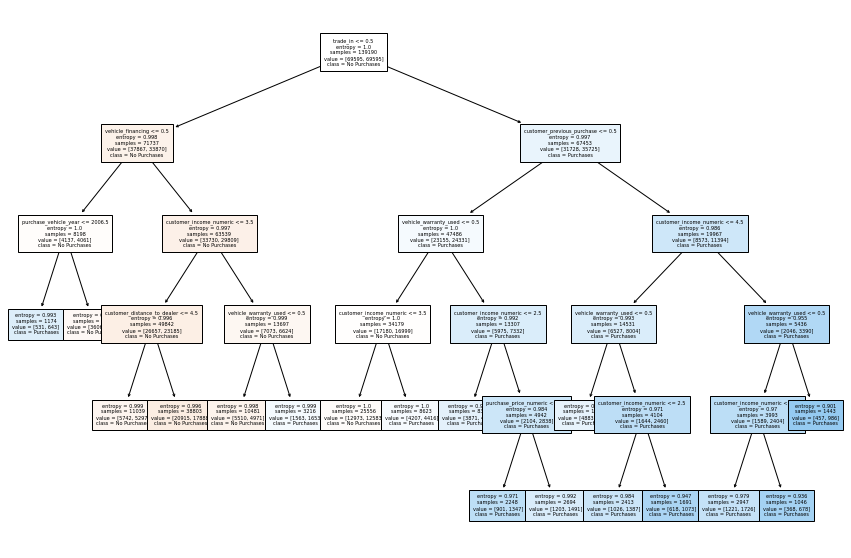

In [84]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names = (X_train).columns, class_names = ["No Purchases","Purchases"],filled=True,fontsize=5);

## Clustering with Interpretation

PCA and visualization

In [354]:
from sklearn.preprocessing import StandardScaler

In [538]:
tmp = data_cleaned_make.drop(columns=['ACURA', 'AUDI', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR',
       'JEEP', 'KIA', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN',
       'OLDSMOBILE', 'PONTIAC', 'PORSCHE', 'SAAB', 'SATURN', 'SCION', 'SMART',
       'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'])

clusterdata = pd.DataFrame(StandardScaler().fit_transform(tmp),
                           columns=tmp.columns)

In [496]:
clusterdata

,purchase_vehicle_year,trade_in,vehicle_financing,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used,subsequent_purchases,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric
0,1.005491,1.053282,0.357443,-0.528979,-0.114487,-0.591840,0.399564,-0.795037,-1.025247,2.995854,-0.215438,-1.121354,-0.272694
1,-1.001994,-0.949414,-2.797651,1.890436,0.056355,-0.591840,-0.438823,1.257803,-1.025247,-0.333795,-0.215438,1.038865,-1.147887
2,0.202497,1.053282,0.357443,1.890436,0.087418,-0.591840,-0.438823,1.257803,-1.025247,-0.333795,1.160086,0.318792,0.164902
3,-2.607982,-0.949414,0.357443,-0.528979,-0.114487,-0.591840,-0.438823,-0.795037,0.975374,-0.333795,-0.903200,-1.121354,-0.710291
4,1.005491,1.053282,0.357443,1.890436,-0.161081,1.689647,0.399564,-0.795037,0.975374,-0.333795,-0.215438,-0.401281,1.477690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304945,0.603994,1.053282,0.357443,1.890436,-0.192143,-0.591840,-0.438823,1.257803,-1.025247,-0.333795,0.472324,1.038865,-0.272694
304946,1.406988,-0.949414,0.357443,-0.528979,-0.021300,-0.591840,2.914724,-0.795037,0.975374,-0.333795,2.535611,0.318792,1.040094
304947,0.202497,-0.949414,0.357443,-0.528979,-0.036832,-0.591840,-0.438823,1.257803,-1.025247,-0.333795,-0.215438,-1.121354,-0.710291
304948,1.005491,1.053282,0.357443,1.890436,-0.098956,-0.591840,0.399564,1.257803,-1.025247,-0.333795,-0.215438,1.758938,-0.710291


In [357]:
from sklearn.cluster import KMeans

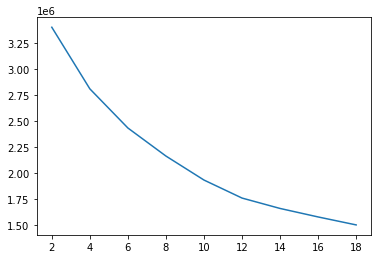

In [358]:
r = range(2,20,2)
distances = []
for i in r:
    distances.append(KMeans(n_clusters=i,n_init=5,algorithm='full').fit(clusterdata).inertia_)

plt.plot(r,distances)

Let's use 6 clusters

In [539]:
km = KMeans(n_clusters=4,algorithm='full').fit(clusterdata)

In [540]:
clusterdata["clusters"]=(km.labels_)

In [541]:
clusterdata.groupby("clusters").count().purchase_vehicle_year

clusters
0     30567
1    136775
2    106315
3     31293
Name: purchase_vehicle_year, dtype: int64

In [542]:
clusterdata.groupby("clusters").mean()

,purchase_vehicle_year,trade_in,vehicle_financing,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used,subsequent_purchases,F,M,U,purchase_price_numeric,customer_age_numeric,customer_income_numeric
clusters,,,,,,,,,,,,,
0,-0.006704,-0.131812,0.021465,-0.112327,-0.031144,0.054384,-0.006999,-0.795037,-1.025247,2.995854,-0.096232,-0.279490,-0.164365
1,-0.062956,0.026552,0.357443,0.023838,0.007304,-0.013658,-0.001802,-0.795037,0.975374,-0.333795,0.079685,0.003381,0.203906
2,0.069720,0.001949,0.357443,-0.077957,-0.007555,0.007400,-0.007821,1.257803,-1.025247,-0.333795,-0.123253,0.052403,-0.180639
3,0.044852,0.006079,-2.797651,0.270380,0.024162,-0.018570,0.041281,-0.021737,0.221489,-0.333369,0.164454,0.080194,-0.116970


Interpretation

In [543]:
clustinterpret = DecisionTreeClassifier(max_depth=5).fit(clusterdata.drop(columns="clusters"), clusterdata.clusters)

In [544]:
clustinterpret.score(clusterdata.drop(columns="clusters"), clusterdata.clusters)

0.9999901623216921

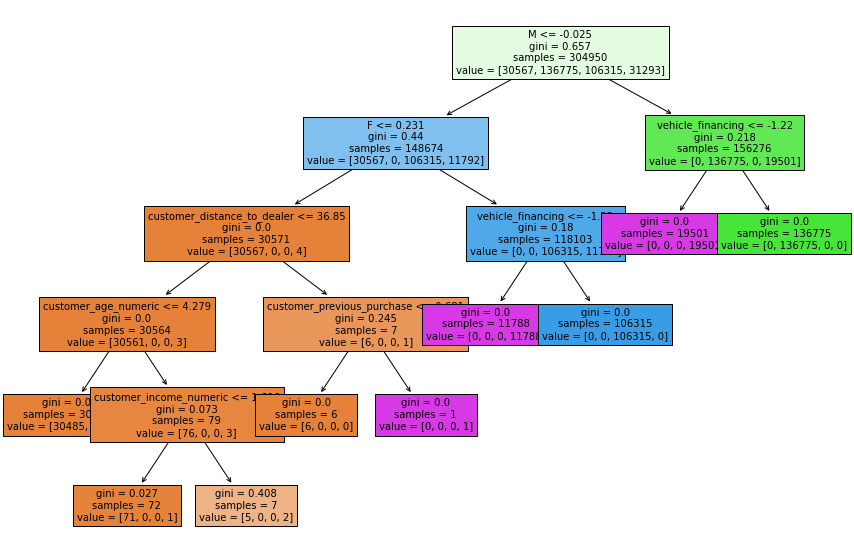

In [560]:
plt.figure(figsize=(15,10))

plot_tree(clustinterpret, feature_names = (clusterdata.drop(columns="clusters")).columns,filled=True,fontsize=10);

In [546]:
for i in range(len(clustinterpret.feature_importances_)):
    if clustinterpret.feature_importances_[i] > 0:
        print(clusterdata.drop(columns="clusters").columns[i], clustinterpret.feature_importances_[i])

vehicle_financing 0.2764310417651329
customer_previous_purchase 8.560318460269852e-06
customer_distance_to_dealer 1.4244336329603394e-06
F 0.22070749950763902
M 0.5028456313281214
customer_age_numeric 1.134823022018985e-06
customer_income_numeric 4.707823991467542e-06


Cluster 1: Unknown gender, no previous purchase

Cluster 2: Male with vehicle financing

Cluster 3: Female with vehicle financing

Cluster 4: Male, no vehicle financing + female, no vehicle financing + unknown, far from dealer, previous purchase

In [575]:
pd.concat([data_cleaned_make.loc[clusterdata.clusters==0,"ACURA":"VOLVO"].mean().sort_values(ascending=False)[:10],
    data_cleaned_make.loc[clusterdata.clusters==1,"ACURA":"VOLVO"].mean().sort_values(ascending=False)[:10],
     data_cleaned_make.loc[clusterdata.clusters==2,"ACURA":"VOLVO"].mean().sort_values(ascending=False)[:10],
          data_cleaned_make.loc[clusterdata.clusters==3,"ACURA":"VOLVO"].mean().sort_values(ascending=False)[:10]],
          axis=1)

,0,1,2,3
NISSAN,0.129748,0.095449,0.133697,0.097530
TOYOTA,0.115648,0.103243,0.113455,0.108938
CHEVROLET,0.112343,0.120183,0.099299,0.097690
HONDA,0.077371,0.068112,0.081014,0.070303
FORD,0.076815,0.127048,0.092894,0.121081
DODGE,0.057807,0.068097,0.049758,0.056722
HYUNDAI,0.041581,0.032630,0.049128,0.038092
MERCEDES-BENZ,0.036314,0.029369,NaN,NaN
BMW,0.033402,0.034729,NaN,0.033554
LEXUS,0.030752,NaN,NaN,NaN


Cluster 1 (Unknown gender, no previous purchases) tends to buy Nissan, Toyota, and Chevrolet. They are the only cluster that buys Lexus and one of two clusters that buy Mercedes-Benz. They are the only cluster that does not buy Jeeps.

Cluster 2 (Male with vehicle financing) tends to buy Ford, Chevrolet, Toyota, and Nissan. Along with cluster 1, they are the only cluster that buys Mercedes Benz.

Cluster 3 (Female with vehicle financing) tends to buy Nissan, Toyota, Chevrolet, Ford, and Honda. They are the only cluster that does not buy BMW. They are the only cluster that buys Kia and Mazda.

Cluster 4 (Male, no vehicle financing + female, no vehicle financing + unknown, far from dealer, previous purchase) tends to buy Ford, Toyota, Chevrolet, and Nissan. They are the only cluster that buys Volkswagen.

Plot clusters

In [551]:
from sklearn.decomposition import PCA

In [552]:
pca = PCA(n_components=2)
pca.fit(clusterdata.drop(columns="clusters"))
pca.explained_variance_ratio_

array([0.15515135, 0.12550003])

In [553]:
X_tf = pca.transform(clusterdata.drop(columns="clusters"))
X_tf

array([[-0.61950214, -0.01499798],
       [-1.27910664, -0.75712586],
       [-0.08044016, -2.50660299],
       ...,
       [-1.9155657 , -0.21920381],
       [-0.64796917, -2.41619487],
       [-0.10886375,  2.86998055]])

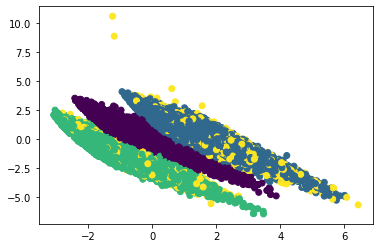

In [563]:
plt.scatter(X_tf[:,0],X_tf[:,1],c=clusterdata.clusters)

In [555]:
pca = PCA(n_components=3)
pca.fit(clusterdata.drop(columns="clusters"))
pca.explained_variance_ratio_

array([0.15515135, 0.12550003, 0.09465011])

In [556]:
X_tf = pca.transform(clusterdata.drop(columns="clusters"))
X_tf

array([[-0.61950214, -0.01499798, -3.24079866],
       [-1.27910664, -0.75712586,  1.49431737],
       [-0.08044016, -2.50660299,  0.52498388],
       ...,
       [-1.9155657 , -0.21920381, -0.49635553],
       [-0.64796917, -2.41619487,  1.1058774 ],
       [-0.10886375,  2.86998055,  0.42910861]])

In [557]:
from mpl_toolkits.mplot3d import Axes3D

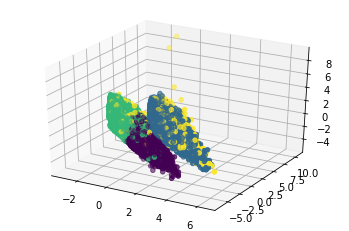

In [558]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tf[:,0],X_tf[:,1],X_tf[:,2],c=clusterdata.clusters)

Three of the clusters can be clearly seen in both the 2D and 3D PCA plots. The three clear groups in the 2D PCA plots can be perfectly mapped to Male, Female, and Unknown clusters. The yellow cluster (cluster 4), however, is not totally separable from the other three. This goes along with the complex interpretation of cluster 4 we got from our tree.

We may not be able to capture all the variance in the data with only 2 or 3 principal components.

## Matrix Completion

https://pypi.org/project/fancyimpute/

In [1]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

In [175]:
grouped = data.dropna().groupby(['customer_gender','vehicle_financing','customer_previous_purchase','customer_age','customer_income','purchase_make']).mean().reset_index()
grouped['id'] = grouped.customer_gender + grouped.vehicle_financing.astype(str) + grouped.customer_previous_purchase.astype(str) + grouped.customer_age + grouped.customer_income
grouped

,customer_gender,vehicle_financing,customer_previous_purchase,customer_age,customer_income,purchase_make,insert_num,purchase_vehicle_year,trade_in,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases,id
0,F,0,0,21 - 30,0 - 20000,CHEVROLET,37191.0,2006.0,0.0,1.0,10.0,1.0,1.0,F0021 - 300 - 20000
1,F,0,0,21 - 30,100001 - 120000,VOLKSWAGEN,350726.0,2013.0,1.0,9.0,10.0,0.0,0.0,F0021 - 30100001 - 120000
2,F,0,0,21 - 30,20001 - 40000,ACURA,3503.0,2005.0,0.0,15.0,10.0,0.0,1.0,F0021 - 3020001 - 40000
3,F,0,0,21 - 30,40001 - 60000,FIAT,94192.0,2012.0,0.0,11.0,10.0,1.0,0.0,F0021 - 3040001 - 60000
4,F,0,0,21 - 30,40001 - 60000,TOYOTA,316595.0,2007.0,0.0,18.0,10.0,0.0,0.0,F0021 - 3040001 - 60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,U,1,1,51 - 60,60001 - 80000,HONDA,163795.0,2009.0,1.0,4.0,9.0,1.0,0.0,U1151 - 6060001 - 80000
782,U,1,1,51 - 60,80001 - 100000,ACURA,1025.0,2011.0,1.0,4.0,10.0,1.0,1.0,U1151 - 6080001 - 100000
783,U,1,1,51 - 60,80001 - 100000,GMC,137321.0,2006.0,0.0,4.0,10.0,0.0,0.0,U1151 - 6080001 - 100000
784,U,1,1,61 - 70,0 - 20000,FORD,120150.0,2011.0,1.0,26.0,9.0,0.0,10.0,U1161 - 700 - 20000


In [188]:
p = pd.pivot_table(grouped[['id','purchase_make','post_purchase_satisfaction']],index="id",columns="purchase_make")
p

post_purchase_satisfaction                          \
purchase_make                                  ACURA AUDI BMW BUICK CADILLAC   
id                                                                             
F0021 - 300 - 20000                              NaN  NaN NaN   NaN      NaN   
F0021 - 30100001 - 120000                        NaN  NaN NaN   NaN      NaN   
F0021 - 3020001 - 40000                         10.0  NaN NaN   NaN      NaN   
F0021 - 3040001 - 60000                          NaN  NaN NaN   NaN      NaN   
F0021 - 3060001 - 80000                          NaN  NaN NaN   NaN      NaN   
...                                              ...  ...  ..   ...      ...   
U1151 - 6020001 - 40000                          NaN  NaN NaN   NaN      NaN   
U1151 - 6040001 - 60000                          NaN  NaN NaN   NaN      NaN   
U1151 - 6060001 - 80000                          NaN  NaN NaN   NaN      NaN   
U1151 - 6080001 - 100000                        10.0  NaN NaN   NaN      NaN   
U1161 - 700 - 20000                              NaN  NaN NaN   NaN      NaN   

                                                               ...          \
purchase_make             CHEVROLET CHRYSLER DODGE  FIAT FORD  ... PONTIAC   
id                                                             ...           
F0021 - 300 - 20000            10.0      NaN   NaN   NaN  NaN  ...     NaN   
F0021 - 30100001 - 120000       NaN      NaN   NaN   NaN  NaN  ...     NaN   
F0021 - 3020001 - 40000         NaN      NaN   NaN   NaN  NaN  ...     NaN   
F0021 - 3040001 - 60000         NaN      NaN   NaN  10.0  NaN  ...     NaN   
F0021 - 3060001 - 80000         NaN      NaN   NaN   NaN  NaN  ...     NaN   
...                             ...      ...   ...   ...  ...  ...     ...   
U1151 - 6020001 - 40000         NaN      NaN   NaN   NaN  NaN  ...     NaN   
U1151 - 6040001 - 60000         NaN      NaN   NaN   NaN  NaN  ...     NaN   
U1151 - 6060001 - 80000         NaN      NaN   NaN   NaN  NaN  ...     NaN   
U1151 - 6080001 - 100000        NaN      NaN   NaN   NaN  NaN  ...     NaN   
U1161 - 700 - 20000             NaN      NaN   NaN   NaN  9.0  ...     NaN   

                                                                           \
purchase_make             PORSCHE SATURN SCION SMART SUBARU SUZUKI TOYOTA   
id                                                                          
F0021 - 300 - 20000           NaN    NaN   NaN   NaN    NaN    NaN    NaN   
F0021 - 30100001 - 120000     NaN    NaN   NaN   NaN    NaN    NaN    NaN   
F0021 - 3020001 - 40000       NaN    NaN   NaN   NaN    NaN    NaN    NaN   
F0021 - 3040001 - 60000       NaN    NaN   NaN   NaN    NaN    NaN   10.0   
F0021 - 3060001 - 80000       NaN    NaN   NaN   NaN    NaN    NaN    NaN   
...                           ...    ...   ...   ...    ...    ...    ...   
U1151 - 6020001 - 40000       NaN    NaN   NaN   NaN    NaN    NaN    NaN   
U1151 - 6040001 - 60000       NaN    NaN   NaN   NaN    NaN    NaN    NaN   
U1151 - 6060001 - 80000       NaN    NaN   NaN   NaN    NaN    NaN    NaN   
U1151 - 6080001 - 100000      NaN    NaN   NaN   NaN    NaN    NaN    NaN   
U1161 - 700 - 20000           NaN    NaN   NaN   NaN    NaN    NaN    NaN   

                                            
purchase_make             VOLKSWAGEN VOLVO  
id                                          
F0021 - 300 - 20000              NaN   NaN  
F0021 - 30100001 - 120000       10.0   NaN  
F0021 - 3020001 - 40000          NaN   NaN  
F0021 - 3040001 - 60000          NaN   NaN  
F0021 - 3060001 - 80000          NaN   NaN  
...                              ...   ...  
U1151 - 6020001 - 40000          NaN   NaN  
U1151 - 6040001 - 60000          NaN   NaN  
U1151 - 6060001 - 80000          NaN   NaN  
U1151 - 6080001 - 100000         NaN   NaN  
U1161 - 700 - 20000              NaN   NaN  

[300 rows x 36 columns]

In [177]:
X_incomplete = (pd.pivot_table(grouped[['id','purchase_make','post_purchase_satisfaction']],index="id",columns="purchase_make")).values
X_incomplete

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, 10., nan],
       [10., nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [10., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [178]:
missingmask = np.isfinite(X_incomplete)
missingmask.mean() #very sparse

0.07277777777777777

In [179]:
X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

Imputing row 1/300 with 35 missing, elapsed time: 0.030
Imputing row 101/300 with 34 missing, elapsed time: 0.069
Imputing row 201/300 with 35 missing, elapsed time: 0.108
[KNN] Warning: 1383/10800 still missing after imputation, replacing with 0


In [180]:
#X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete)

[SoftImpute] Max Singular Value of X_init = 144.075072
[SoftImpute] Iter 1: observed MAE=0.498787 rank=36
[SoftImpute] Iter 2: observed MAE=0.498741 rank=36
[SoftImpute] Iter 3: observed MAE=0.498635 rank=36
[SoftImpute] Iter 4: observed MAE=0.498469 rank=36
[SoftImpute] Iter 5: observed MAE=0.498253 rank=36
[SoftImpute] Iter 6: observed MAE=0.497996 rank=36
[SoftImpute] Iter 7: observed MAE=0.497696 rank=36
[SoftImpute] Iter 8: observed MAE=0.497357 rank=36
[SoftImpute] Iter 9: observed MAE=0.496466 rank=35
[SoftImpute] Iter 10: observed MAE=0.495505 rank=35
[SoftImpute] Iter 11: observed MAE=0.494839 rank=35
[SoftImpute] Iter 12: observed MAE=0.494308 rank=35
[SoftImpute] Iter 13: observed MAE=0.493834 rank=35
[SoftImpute] Iter 14: observed MAE=0.493376 rank=35
[SoftImpute] Iter 15: observed MAE=0.492707 rank=34
[SoftImpute] Iter 16: observed MAE=0.491436 rank=34
[SoftImpute] Iter 17: observed MAE=0.490808 rank=34
[SoftImpute] Iter 18: observed MAE=0.490324 rank=34
[SoftImpute] Iter 

In [181]:
#knn_mse
((X_filled_knn[missingmask] - X_incomplete[missingmask]) ** 2).mean()

0.0

In [182]:
X_filled_knn

array([[ 9.000034  , 10.00000028,  9.        , ...,  8.66666667,
         9.66666667,  5.00000199],
       [10.        , 10.00000014,  9.33333333, ...,  8.        ,
        10.        ,  5.        ],
       [10.        ,  0.        ,  9.33333333, ..., 10.        ,
         8.88888889,  8.        ],
       ...,
       [10.        , 10.        ,  9.        , ...,  9.83333333,
         9.        ,  8.        ],
       [10.        , 10.        , 10.        , ..., 10.        ,
         8.66666667,  8.        ],
       [ 4.000072  ,  9.99999999,  9.66666667, ...,  9.        ,
         9.1250035 ,  8.        ]])

In [183]:
#softimpute_mse
((X_filled_softimpute[missingmask] - X_incomplete[missingmask]) ** 2).mean()

0.0

In [196]:
X_filled_softimpute

array([[ 1.31773781,  0.22338832,  1.9324717 , ...,  1.45889031,
         1.54190372,  0.67219127],
       [ 2.20472059,  3.77575221,  1.73305379, ...,  2.63891316,
        10.        ,  1.14102665],
       [10.        ,  0.30908315,  2.31637047, ...,  2.61879232,
         2.83698793,  1.85129587],
       ...,
       [ 0.69566899,  1.90734616,  2.20080824, ...,  2.93374811,
         2.33040114,  0.30638196],
       [10.        ,  1.40820869,  2.73711588, ...,  1.72790688,
         2.67039511,  2.53758389],
       [ 1.62800568,  1.10144092,  1.93253479, ...,  4.43282699,
         1.51954024,  0.71096773]])

In [197]:
len(X_filled_softimpute)

300

In [198]:
len(X_filled_softimpute[0])

36

Example of recommendation we can make

In [220]:
p.iloc[2]

                            purchase_make
post_purchase_satisfaction  ACURA            10.0
                            AUDI              NaN
                            BMW               NaN
                            BUICK             NaN
                            CADILLAC          NaN
                            CHEVROLET         NaN
                            CHRYSLER          NaN
                            DODGE             NaN
                            FIAT              NaN
                            FORD              NaN
                            GMC               NaN
                            HONDA             NaN
                            HUMMER            NaN
                            HYUNDAI           NaN
                            INFINITI          NaN
                            JEEP              NaN
                            KIA               NaN
                            LAND ROVER        NaN
                            LEXUS             NaN
        

We know a female with no vehicle financing and no prior purchases, who is 21-30 and has an income from 20001-40000 purchased an Acura, but we have no way of knowing which other car brands this customer type may like. So, we can use our completed matrix to predict their satisfaction for the other car makes.

In [221]:
cars = np.array((p.columns).get_level_values(1))

for i in range(len(X_filled_softimpute[2])):
    print(cars[i], X_filled_softimpute[2][i])


ACURA 10.0
AUDI 0.30908314511961776
BMW 2.316370465859026
BUICK -0.5629502816090889
CADILLAC -0.04375806077784666
CHEVROLET 2.390590227470152
CHRYSLER 4.213844451520789
DODGE 1.2460506133814533
FIAT -0.019409461836344823
FORD 3.1541725856284
GMC 4.630291796245536
HONDA 1.1867092601050249
HUMMER 2.60447534734663
HYUNDAI 1.0408423216576503
INFINITI 0.5426114863934228
JEEP 0.22493782640515025
KIA 3.210568392853319
LAND ROVER 3.400373463433174
LEXUS 3.612598999090284
LINCOLN 0.30179226589940833
MAZDA 1.647383981100539
MERCEDES-BENZ 2.373776697657971
MERCURY -0.024124450828850206
MINI -0.43660476611540305
MITSUBISHI 0.5952654444451008
NISSAN 1.4157397095188624
PONTIAC 0.4045780936821684
PORSCHE -1.630978552574396e-15
SATURN 0.4697144497573971
SCION -2.07830262697645
SMART -0.1782814502298152
SUBARU 3.441668393491684
SUZUKI -0.033517521624772305
TOYOTA 2.6187923249168445
VOLKSWAGEN 2.836987925852551
VOLVO 1.8512958735460634


We now see that the most likely car makes that customers in this group would buy are GMC and Lexus. Carmax should not recommend Scion cars to this customer group.

Model-level recommendations

In [239]:
grouped = data.dropna().groupby(['customer_gender','customer_income','purchase_model']).mean().reset_index()
grouped['id'] = grouped.customer_gender + grouped.customer_income.astype(str)
grouped

,customer_gender,customer_income,purchase_model,insert_num,purchase_vehicle_year,trade_in,vehicle_financing,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases,id
0,F,0 - 20000,ALTIMA,257231.0,2009.0,1.0,1.0,0.0,13.5,10.0,0.0,0.5,F0 - 20000
1,F,0 - 20000,AVENGER,76294.0,2012.0,0.0,0.0,0.0,13.0,9.0,0.0,1.0,F0 - 20000
2,F,0 - 20000,AVEO,28228.0,2011.0,0.0,1.0,0.0,8.0,9.0,1.0,0.0,F0 - 20000
3,F,0 - 20000,BEETLE,344345.0,2010.0,1.0,0.0,1.0,25.0,9.0,0.0,0.0,F0 - 20000
4,F,0 - 20000,COBALT,33183.0,2009.0,1.0,1.0,0.0,31.0,8.0,1.0,0.0,F0 - 20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,U,80001 - 100000,MUSTANG,130123.0,2011.0,0.0,1.0,0.0,13.0,10.0,1.0,1.0,U80001 - 100000
774,U,80001 - 100000,PATHFINDER,275201.0,2011.0,0.0,0.0,1.0,44.0,9.0,0.0,1.0,U80001 - 100000
775,U,80001 - 100000,SIERRA 1500,137321.0,2006.0,0.0,1.0,1.0,4.0,10.0,0.0,0.0,U80001 - 100000
776,U,80001 - 100000,TC,297059.0,2008.0,1.0,0.0,1.0,4.0,10.0,1.0,1.0,U80001 - 100000


In [240]:
p= pd.pivot_table(grouped[['id','purchase_model','post_purchase_satisfaction']],index="id",columns="purchase_model")
p

post_purchase_satisfaction                                    \
purchase_model                          200   300 300 C SRT   325   328   330   
id                                                                              
F0 - 20000                              NaN   NaN       NaN   NaN   NaN   NaN   
F100001 - 120000                        NaN   NaN       NaN   NaN   NaN   NaN   
F120001 - 140000                        NaN   NaN       NaN   NaN   NaN   NaN   
F140001 - 160000                        NaN   NaN       NaN   NaN   NaN   NaN   
F160001 - 180000                        NaN   NaN       NaN   NaN   NaN   NaN   
F180001 - 200000                        NaN   NaN       NaN   NaN   NaN   NaN   
F200001+                                NaN   NaN       NaN   NaN   NaN   NaN   
F20001 - 40000                          NaN   9.0       NaN   NaN   NaN   NaN   
F40001 - 60000                         10.0   NaN      10.0   NaN   NaN   NaN   
F60001 - 80000                          NaN   NaN       NaN   NaN  10.0   NaN   
F80001 - 100000                         NaN   NaN       NaN   NaN   9.0   NaN   
M0 - 20000                              NaN   NaN       NaN   NaN  10.0   NaN   
M100001 - 120000                        NaN   NaN       NaN  10.0   9.0   NaN   
M120001 - 140000                        NaN  10.0       NaN   NaN  10.0   NaN   
M140001 - 160000                        NaN   NaN       NaN   NaN   NaN   NaN   
M160001 - 180000                        NaN   NaN       NaN   NaN   NaN   NaN   
M180001 - 200000                        NaN  10.0       NaN   NaN   NaN   NaN   
M200001+                                NaN   NaN       NaN   NaN   NaN   NaN   
M20001 - 40000                          NaN  10.0       NaN   NaN   NaN   NaN   
M40001 - 60000                          4.0  10.0       NaN   NaN   9.0  10.0   
M60001 - 80000                         10.0   NaN       NaN   NaN  10.0   NaN   
M80001 - 100000                         NaN   NaN       NaN   NaN   8.5   NaN   
U0 - 20000                              NaN   NaN       NaN   NaN   NaN   NaN   
U100001 - 120000                        NaN   NaN       NaN   NaN   NaN   NaN   
U160001 - 180000                        NaN   NaN       NaN   NaN   NaN   NaN   
U200001+                                NaN   NaN       NaN   NaN   NaN   NaN   
U20001 - 40000                          NaN   NaN       NaN   NaN   NaN   NaN   
U40001 - 60000                          NaN   NaN       NaN   NaN   NaN   NaN   
U60001 - 80000                          NaN   NaN       NaN   NaN   NaN   NaN   
U80001 - 100000                         NaN   NaN       NaN   NaN   NaN   NaN   

                                           ...                             \
purchase_model     335 350Z  370Z 4RUNNER  ... WRANGLER    X3    X5    XA   
id                                         ...                              
F0 - 20000         NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN  10.0   
F100001 - 120000  10.0  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F120001 - 140000   NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F140001 - 160000   NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F160001 - 180000   NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F180001 - 200000   NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F200001+           NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F20001 - 40000     9.0  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F40001 - 60000     NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F60001 - 80000     NaN  9.0   NaN     NaN  ...      NaN   NaN   NaN   NaN   
F80001 - 100000    NaN  NaN   NaN     NaN  ...      NaN  10.0   NaN   NaN   
M0 - 20000         NaN  NaN   NaN     5.0  ...     10.0   NaN  10.0   NaN   
M100001 - 120000   NaN  9.0  10.0     NaN  ...      NaN   NaN   NaN   NaN   
M120001 - 140000   NaN  NaN   NaN     NaN  ...      NaN   NaN   NaN   NaN   
M140001 - 160000   NaN  NaN   NaN 

In [241]:
X_incomplete = (pd.pivot_table(grouped[['id','purchase_model','post_purchase_satisfaction']],index="id",columns="purchase_model")).values
X_incomplete

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [242]:
missingmask = np.isfinite(X_incomplete)
missingmask.mean()

0.10130208333333333

In [243]:
X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

Imputing row 1/30 with 222 missing, elapsed time: 0.005
[KNN] Warning: 547/7680 still missing after imputation, replacing with 0


In [244]:
#X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete)

[SoftImpute] Max Singular Value of X_init = 150.693184
[SoftImpute] Iter 1: observed MAE=0.486448 rank=30
[SoftImpute] Iter 2: observed MAE=0.486382 rank=30
[SoftImpute] Iter 3: observed MAE=0.486269 rank=30
[SoftImpute] Iter 4: observed MAE=0.486112 rank=30
[SoftImpute] Iter 5: observed MAE=0.485921 rank=30
[SoftImpute] Iter 6: observed MAE=0.485697 rank=30
[SoftImpute] Iter 7: observed MAE=0.485439 rank=30
[SoftImpute] Iter 8: observed MAE=0.485149 rank=30
[SoftImpute] Iter 9: observed MAE=0.484841 rank=30
[SoftImpute] Iter 10: observed MAE=0.484508 rank=30
[SoftImpute] Iter 11: observed MAE=0.484150 rank=30
[SoftImpute] Iter 12: observed MAE=0.483787 rank=30
[SoftImpute] Iter 13: observed MAE=0.483401 rank=30
[SoftImpute] Iter 14: observed MAE=0.482992 rank=30
[SoftImpute] Iter 15: observed MAE=0.482562 rank=30
[SoftImpute] Iter 16: observed MAE=0.482125 rank=30
[SoftImpute] Iter 17: observed MAE=0.481687 rank=30
[SoftImpute] Iter 18: observed MAE=0.481257 rank=30
[SoftImpute] Iter 

In [245]:
#knn_mse
((X_filled_knn[missingmask] - X_incomplete[missingmask]) ** 2).mean()

0.0

In [246]:
X_filled_knn

array([[ 7.52134576,  9.99999992, 10.        , ..., 10.        ,
         9.26990355,  9.50121358],
       [ 8.0700506 ,  9.60526331, 10.        , ..., 10.00000024,
         9.68421052,  9.24882685],
       [ 8.82926829,  9.67741962, 10.        , ..., 10.        ,
         9.57142809,  9.64285714],
       ...,
       [ 8.89970708,  9.99999986, 10.        , ...,  9.99999977,
         9.62106674,  9.21033897],
       [ 6.24192185,  9.99999168, 10.        , ..., 10.0000002 ,
         9.000001  ,  9.42857094],
       [ 8.77908094, 10.00000006, 10.        , ..., 10.00000013,
         9.13793075,  9.91267565]])

In [247]:
#softimpute_mse
((X_filled_softimpute[missingmask] - X_incomplete[missingmask]) ** 2).mean()

0.0

In [248]:
X_filled_softimpute

array([[4.85512696, 6.3296331 , 3.46741513, ..., 2.45827092, 2.19542313,
        4.88304642],
       [3.27080867, 2.43011517, 2.56085927, ..., 1.4467784 , 2.27529824,
        1.71759531],
       [0.93971032, 0.75650397, 0.67193157, ..., 0.92344415, 2.42949078,
        0.79356721],
       ...,
       [2.74873871, 5.61014379, 1.3059313 , ..., 0.55975192, 4.8073524 ,
        3.80536096],
       [2.37635061, 8.01411951, 1.22586466, ..., 0.72126032, 2.44920211,
        2.75120325],
       [2.52386525, 2.75440042, 1.64195481, ..., 4.38301125, 3.00631145,
        3.70695309]])

Example recommendation

In [261]:
(p.iloc[20])

                            purchase_model
post_purchase_satisfaction  200               10.0
                            300                NaN
                            300 C SRT          NaN
                            325                NaN
                            328               10.0
                                              ... 
                            XD                 NaN
                            XTERRA             7.0
                            YARIS              NaN
                            YUKON              NaN
                            Z4                 9.0
Name: M60001 - 80000, Length: 256, dtype: float64

We see that males who have incomes from 60001 - 80000 dollars purchased some of the above models in 2013, but we would like to recommend other models as well.

In [260]:
cars = ((p.iloc[20])[p.iloc[20].isnull()]).index.get_level_values(1)

for i in range(len(cars)):
    print(cars[i], X_filled_softimpute[20][i])


300 10.0
300 C SRT 5.039957181577224
325 3.2687216457527994
330 3.0908616620213065
350Z 10.0
370Z 2.6420555536679795
500 10.0
528 5.462188521868523
535 5.928911416113614
640 8.0
650 4.32200753542964
750 4.729607017106171
A3 10.0
A6 3.2687216457528083
ACADIA 2.1331918581638085
ACCENT 4.984843206238975
ACCORD CROSSTOUR 0.4785520546783442
AURA 3.6697414627499176
AVALANCHE 1500 10.0
AVALON 0.24134871346883566
AVENGER 2.6114512700487524
AVEO 0.9058085600919167
BEETLE 9.0
C230 8.105917562952646
CALIBER 10.0
CAMARO 10.0
CAPTIVA SPORT 2.9418494811775266
CARAVAN 4.099444836597003
CAYENNE 4.5795268791906665
CC 6.201698682904302
CENTURY 7.89136902976885
CHALLENGER 5.920404944840705
CHARGER 2.5280041680837404
CIVIC 10.0
CIVIC HYBRID 5.421661251350911
CLS550 2.7087336788647542
COBALT 8.0
COLORADO 1.5297078102612947
COMMANDER 3.669741462749916
CORVETTE 0.24134871346883818
CRUZE 4.603775989232306
CT 200H 1.006453955657688
CUBE 2.1136444429343766
CX-5 6.7035138211761165
CX-7 7.174632992369152
DAKOTA 3

Of the models that males with incomes from 60001-80000 dollars did not buy in 2013, we predict that this group of customers would be most satisfied with many of the models like the Taurus, the Tiguan, and the Vibe. Carmax should not recommend the Aveo or the Tacoma for these customers as they have low predicted satisfaction ratings.

## Conclusions and Future Work

We have insights into which groups of customers prefer different makes, models, and prices of vehicles, and a method for determining which models or makes to recommend to different customer groups for the best estimated results.

Thoughts on future work:
- With full purchase histories for each customer/customer ids, we could create better recommendations
- Is subsequent purchase count the best way to evaluate the quality of a purchase? Are there other metrics we could use?

[Top](#Table-of-Contents)